In [41]:
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import zstandard as zstd

python(83161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [9]:
dir="../data/"

sport_category_metadata = pd.read_parquet(dir+"filtered_sport_category_metadata.parquet",engine="fastparquet")
sport_category_without_discription_metadata = pd.read_parquet(dir+"filtered_sport_category_without_description_column_metadata.parquet",engine="fastparquet")


In [14]:
print("Data size is {}".format(sport_category_metadata.shape[0]))
sport_category_metadata.head()

Data size is 4354412


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:57.427254,Can I catch 100 lbs of catfish LIVE. Me and Ja...,35.0,JOeSxtcNdHQ,8620,1673.0,"catfishing,fishing,fishing challenge,catfish,c...",Catching 100 lbs of Catfish 🔴Live,2019-10-01 00:00:00,48737.0
1,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:58.108323,,15.0,EPMLTw2zINw,355,1297.0,,big cat,2019-10-01 00:00:00,19999.0
2,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:58.773085,Are you ready to enter the high fashion world ...,78.0,Y1_pK68iSYQ,603,3305.0,"Catfishing,how to catch catfish,fishing,classy...",Classy Catfishing - How to Catch Catfish the P...,2019-09-28 00:00:00,58518.0
3,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:59.465346,Saltwater fishing out of Newquay Cornwall UK. ...,70.0,jF8TSo3ZfTc,1426,1889.0,"Fishing,Fishing uk,Angling,Sea angling,sea ang...",2 Day Saltwater Fishing Catch & Cook - UK Sea ...,2019-09-21 00:00:00,71998.0
4,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:40:00.188768,My family spent 3 weeks touring England and fi...,73.0,Gp00dNaVouo,990,2699.0,"Fishing,catfish,wels catfish,how to catch catf...",How to Catch Wels Catfish - Fishing for Catfis...,2019-09-14 00:00:00,101924.0


In [15]:
print("Data size is {}".format(sport_category_without_discription_metadata.shape[0]))
sport_category_without_discription_metadata.head()

Data size is 4354412


,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:57.427254,35.0,JOeSxtcNdHQ,8620,1673.0,"catfishing,fishing,fishing challenge,catfish,c...",Catching 100 lbs of Catfish 🔴Live,2019-10-01 00:00:00,48737.0
1,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:58.108323,15.0,EPMLTw2zINw,355,1297.0,,big cat,2019-10-01 00:00:00,19999.0
2,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:58.773085,78.0,Y1_pK68iSYQ,603,3305.0,"Catfishing,how to catch catfish,fishing,classy...",Classy Catfishing - How to Catch Catfish the P...,2019-09-28 00:00:00,58518.0
3,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:59.465346,70.0,jF8TSo3ZfTc,1426,1889.0,"Fishing,Fishing uk,Angling,Sea angling,sea ang...",2 Day Saltwater Fishing Catch & Cook - UK Sea ...,2019-09-21 00:00:00,71998.0
4,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:40:00.188768,73.0,Gp00dNaVouo,990,2699.0,"Fishing,catfish,wels catfish,how to catch catf...",How to Catch Wels Catfish - Fishing for Catfis...,2019-09-14 00:00:00,101924.0


# Create dataset of NBA season duration

In [108]:
data = {
    "Season": [f"{year}-{year+1}" for year in range(2006, 2020)],
    "Start_Date": [
        "2006-10-31", "2007-10-30", "2008-10-28", "2009-10-27", 
        "2010-10-26", "2011-12-25", "2012-10-30", "2013-10-29", 
        "2014-10-28", "2015-10-27", "2016-10-25", "2017-10-17", 
        "2018-10-16", "2019-10-22"
    ],
    "End_Date": [
        "2007-04-18", "2008-04-16", "2009-04-15", "2010-04-14", 
        "2011-04-13", "2012-04-26", "2013-04-17", "2014-04-16", 
        "2015-04-15", "2016-04-13", "2017-04-12", "2018-04-11", 
        "2019-04-10", "2020-03-11"
    ],
    "Playoff_Start": [
        "2007-04-21", "2008-04-19", "2009-04-18", "2010-04-17", 
        "2011-04-16", "2012-04-28", "2013-04-20", "2014-04-19", 
        "2015-04-18", "2016-04-16", "2017-04-15", "2018-04-14", 
        "2019-04-13", "2020-08-17"  
    ],
    "Finals_Start": [
        "2007-06-07", "2008-06-05", "2009-06-04", "2010-06-03", 
        "2011-05-31", "2012-06-12", "2013-06-06", "2014-06-05", 
        "2015-06-04", "2016-06-02", "2017-06-01", "2018-05-31", 
        "2019-05-30", "2020-09-30"  
    ],
    "Finals_End": [
        "2007-06-14", "2008-06-17", "2009-06-14", "2010-06-17", 
        "2011-06-12", "2012-06-21", "2013-06-20", "2014-06-15", 
        "2015-06-16", "2016-06-19", "2017-06-12", "2018-06-08", 
        "2019-06-13", "2020-10-11"  
    ]
}
NBA_season=pd.DataFrame(data)

In [109]:
NBA_season

,Season,Start_Date,End_Date,Playoff_Start,Finals_Start,Finals_End
0,2006-2007,2006-10-31,2007-04-18,2007-04-21,2007-06-07,2007-06-14
1,2007-2008,2007-10-30,2008-04-16,2008-04-19,2008-06-05,2008-06-17
2,2008-2009,2008-10-28,2009-04-15,2009-04-18,2009-06-04,2009-06-14
3,2009-2010,2009-10-27,2010-04-14,2010-04-17,2010-06-03,2010-06-17
4,2010-2011,2010-10-26,2011-04-13,2011-04-16,2011-05-31,2011-06-12
5,2011-2012,2011-12-25,2012-04-26,2012-04-28,2012-06-12,2012-06-21
6,2012-2013,2012-10-30,2013-04-17,2013-04-20,2013-06-06,2013-06-20
7,2013-2014,2013-10-29,2014-04-16,2014-04-19,2014-06-05,2014-06-15
8,2014-2015,2014-10-28,2015-04-15,2015-04-18,2015-06-04,2015-06-16
9,2015-2016,2015-10-27,2016-04-13,2016-04-16,2016-06-02,2016-06-19


# Dataset = filtered metadata by category

### Filter the data with tags
tag = "basketball" "NBA"

In [81]:
#Filter the data by key word such as "NBA" and "basketball"
filtered_str_nba=sport_category_without_discription_metadata[sport_category_without_discription_metadata["tags"].str.contains(r'\bnba\b', case=False, na=False)]
filtered_str_basketball=sport_category_without_discription_metadata[sport_category_without_discription_metadata["tags"].str.contains("basketball", case=False, na=False)]
filtered_str_both=filtered_str_basketball[filtered_str_basketball["tags"].str.contains(r'\bnba\b', case=False, na=False)]

In [37]:
print("The amount of data which contains \"nba\" in tags: {}".format(filtered_str_nba.shape[0]))
print("The amount of data which contains \"basketball\" in tags: {}".format(filtered_str_basketball.shape[0]))
print("The amount of data which contains \"basketball and nba\" in tags: {}".format(filtered_str_both.shape[0]))

The amount of data which contains "nba" in tags: 324679
The amount of data which contains "basketball" in tags: 425004
The amount of data which contains "basketball and nba" in tags: 236353


#### word cloud

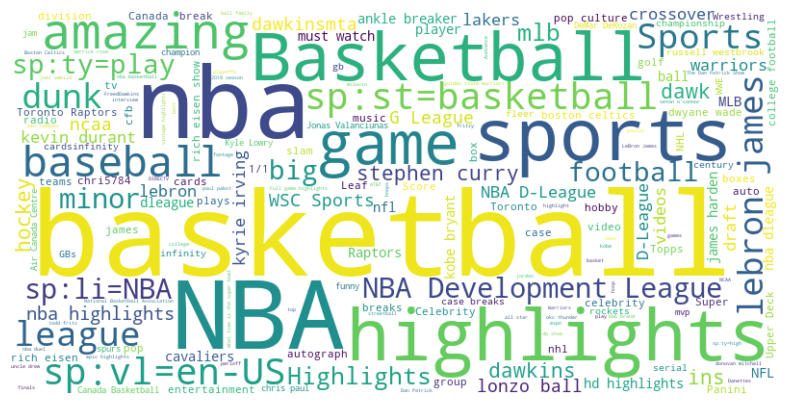

In [65]:
from collections import Counter
from wordcloud import WordCloud


# Extract tags and split them into individual tags

# Combine all tags into a single list
all_tags = [tag for sublist in filtered_str_both['tags'].str.split(',').tolist() for tag in sublist]

# Count the frequency of each tag
tag_counts = Counter(all_tags)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Upload date

#### Analysis on upload year

In [82]:
def sort_time_year(data,category_name,title=None):
    date=pd.to_datetime(data[category_name])
    date_sort=date.dt.year.value_counts().sort_index()
    return date_sort


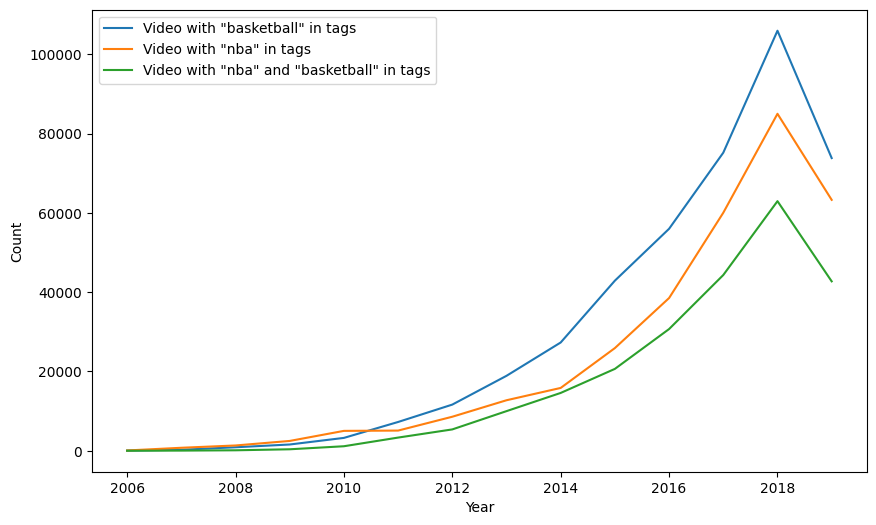

In [83]:
#upload date plot
plt.figure(figsize=(10, 6))
p1=sort_time_year(filtered_str_basketball,"upload_date")
p2=sort_time_year(filtered_str_nba,"upload_date")
p4=sort_time_year(filtered_str_both,"upload_date")

p1.plot(label="Video with \"basketball\" in tags")
p2.plot(label="Video with \"nba\" in tags")
p4.plot(label="Video with \"nba\" and \"basketball\" in tags")
plt.xlabel('Year')
plt.ylabel('Count')

plt.legend()
plt.show()

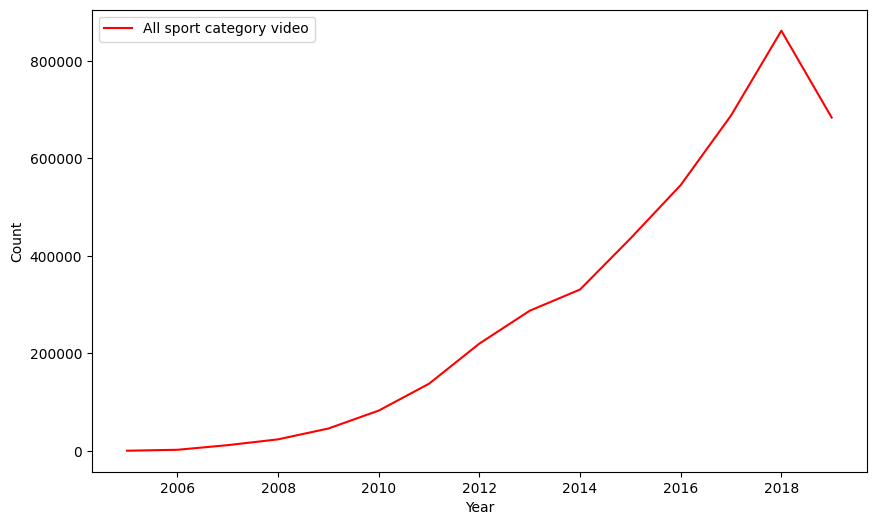

In [250]:
#what is plot of the upload date for all sport categorized video??
plt.figure(figsize=(10, 6))
p3=sort_time_year(sport_category_without_discription_metadata,"upload_date")
p3.plot(label="All sport category video",color="red")
plt.xlabel('Year')
plt.ylabel('Count')

plt.legend()
plt.show()

#### Analysis on upload per month over years

/var/folders/m7/41nytqlj2xz8_vx7g_hdxdfm0000gn/T/ipykernel_82272/2482020786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_str_both['year']=upload_date.dt.year
/var/folders/m7/41nytqlj2xz8_vx7g_hdxdfm0000gn/T/ipykernel_82272/2482020786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_str_both['month']=upload_date.dt.month
/var/folders/m7/41nytqlj2xz8_vx7g_hdxdfm0000gn/T/ipykernel_82272/2482020786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

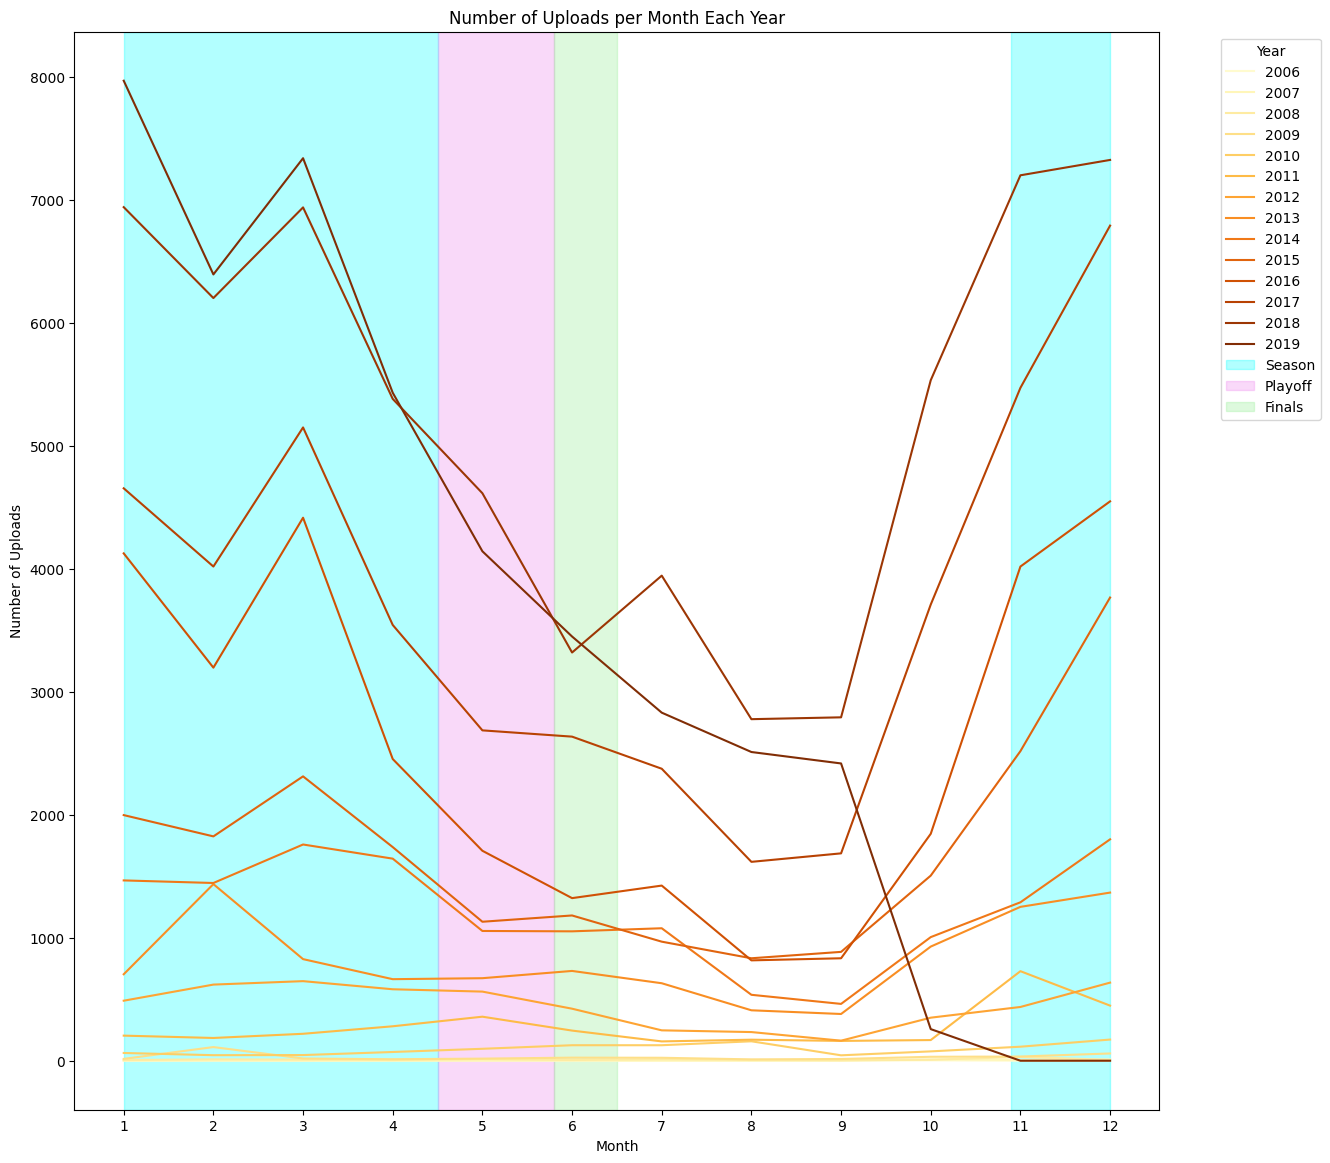

In [248]:
# use filtered_str_both
upload_date=pd.to_datetime(filtered_str_both["upload_date"])
filtered_str_both['year']=upload_date.dt.year
filtered_str_both['month']=upload_date.dt.month
filtered_str_both['year'] = filtered_str_both['year'].astype('category')

upload_counts = filtered_str_both.groupby(['year', 'month']).size().reset_index(name='upload_count')
plt.figure(figsize=(14, 14))
sns.lineplot(data=upload_counts,x='month', y='upload_count',hue='year', palette="YlOrBr")

plt.title('Number of Uploads per Month Each Year')
plt.xlabel('Month')
plt.ylabel('Number of Uploads')

plt.axvspan(1, 4.5, color='cyan', alpha=0.3, label='Season')
plt.axvspan(10.9, 12, color='cyan', alpha=0.3)
# plt.axvline(x=4.5, color='violet', linestyle='--', label='Playoff starts')
plt.axvspan(4.5, 5.8, color='violet', alpha=0.3, label='Playoff')
plt.axvspan(5.8, 6.5, color='lightgreen', alpha=0.3, label='Finals')

plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(np.arange(1, 13, 1))

plt.show()


## Number of views

### per month over years

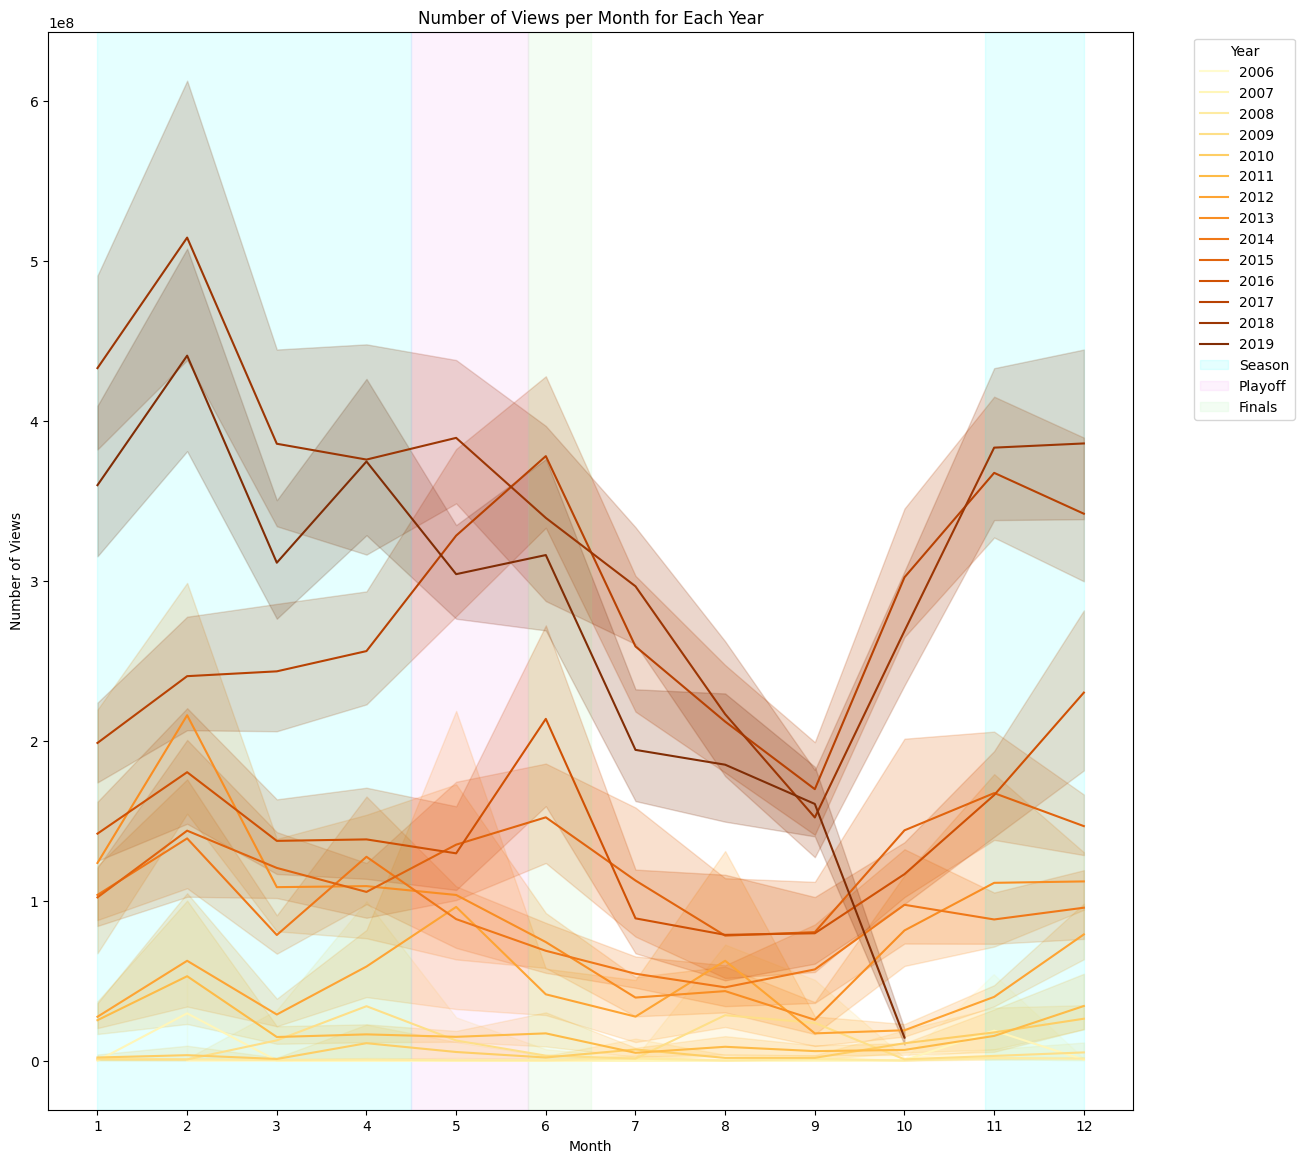

In [131]:
plt.figure(figsize=(14, 14))
sns.lineplot(data=filtered_str_both,x='month', y='view_count',hue='year',estimator="sum", palette="YlOrBr")

plt.title('Number of Views per Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Number of Views')
plt.axvspan(1, 4.5, color='cyan', alpha=0.1, label='Season')
plt.axvspan(10.9, 12, color='cyan', alpha=0.1)
# plt.axvline(x=4.5, color='violet', linestyle='--', label='Playoff starts')
plt.axvspan(4.5, 5.8, color='violet', alpha=0.1, label='Playoff')
plt.axvspan(5.8, 6.5, color='lightgreen', alpha=0.1, label='Finals')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(np.arange(1, 13, 1))

plt.show()

# Dataset= filtered metadata by tags and title

In [ ]:
df=pd.read_parquet(dir+"filtered_sport_metadata(by_tags_and_title)_without_description_column_and_gaming_category.parquet", engine="fastparquet")

In [151]:
print("Data size is {}".format(df.shape[0]))
df.head()

Data size is 4437470


,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
index,,,,,,,,,,,
1,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:49.741716,1.0,lWvsC0Jltgk,348,180.0,"marina del rey,sportsfishing,charter,fishing c...",Marina Del Rey Sportsfishing Charter - Catch S...,2016-02-09 00:00:00,9888.0
2,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:40:13.249229,83.0,39y4DoTezMc,360,2323.0,"livewell,live well,bait,fishing,fish,bluegill ...",Secret fish bait and $8 portable livewell,2015-09-22 00:00:00,304856.0
3,Education,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:40:35.242542,20.0,-9AqA5zPmxU,31,130.0,"Pufferfish (Organism Classification),puffer fi...",Puffer fish fail! Puffer fish gets gas - funny...,2015-03-28 00:00:00,15250.0
4,Education,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:57.349726,0.0,zO2iJKejdDo,116,47.0,"live bait,keep live bait alive,transporting li...",How to keep live bait alive while moving spots,2014-08-31 00:00:00,3646.0
5,Education,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:40:17.335449,45.0,4fWLk2eDkA0,837,473.0,"Carp Fishing,Particle bait,deer corn,maize,hem...",Best carp fishing particle bait ever: Super ch...,2014-04-10 00:00:00,188404.0


In [244]:
df_category_percentage=df["categories"].value_counts(dropna=True)

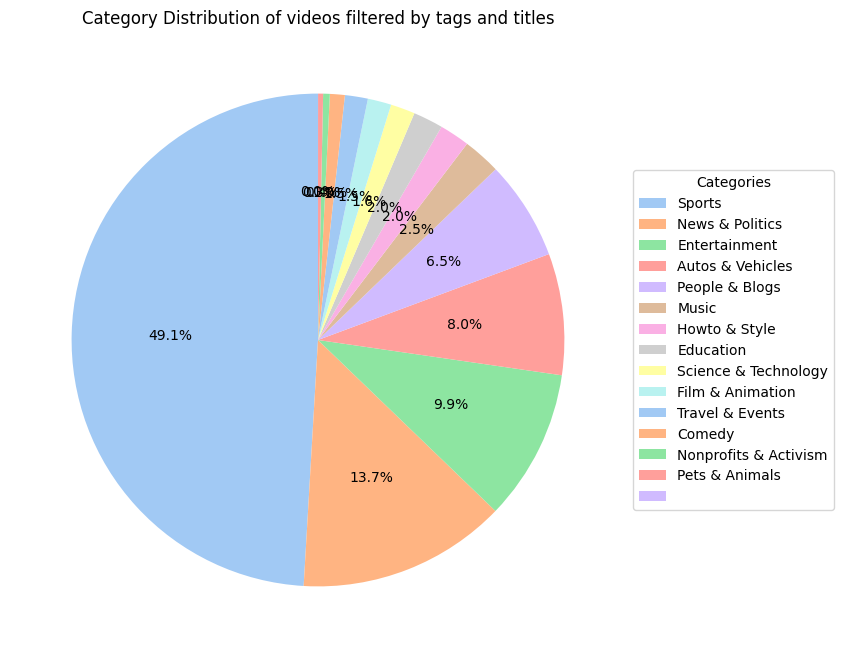

In [247]:

# Plot a pie chart
colors = sns.color_palette("pastel", len(df_category_percentage))
plt.figure(figsize=(8, 8))  # Set figure size
plt.pie(df_category_percentage, startangle=90,labels=None,colors=colors,autopct='%1.1f%%')
plt.legend(labels=df_category_percentage.index, loc="center left", bbox_to_anchor=(1, 0.5), title="Categories")
# Add a title
plt.title('Category Distribution of videos filtered by tags and titles')

# Display the plot
plt.show()

In [263]:
df[df["categories"]=="Education"].head()

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
index,,,,,,,,,,,
3,Education,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:40:35.242542,20.0,-9AqA5zPmxU,31,130.0,"Pufferfish (Organism Classification),puffer fi...",Puffer fish fail! Puffer fish gets gas - funny...,2015-03-28,15250.0
4,Education,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:57.349726,0.0,zO2iJKejdDo,116,47.0,"live bait,keep live bait alive,transporting li...",How to keep live bait alive while moving spots,2014-08-31,3646.0
5,Education,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:40:17.335449,45.0,4fWLk2eDkA0,837,473.0,"Carp Fishing,Particle bait,deer corn,maize,hem...",Best carp fishing particle bait ever: Super ch...,2014-04-10,188404.0
6,Education,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:40:23.680288,3.0,B7fT6xOrQlA,95,191.0,"catch shad,casting net,catfishing bait,Cast Ne...",Entire school of shad with one casting net,2014-01-21,40878.0
7,Education,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:40:24.874524,6.0,-3A0jSr6wHA,84,178.0,"beginner catfishing rod,beginner catfishing ge...","Beginner Catfishing Rod, Reel, Line, Rigs, Wei...",2014-01-20,21748.0


### filter again

In [150]:
# filter data with tags (which contains nba or basketball)
filtered_df_nba=df[df["tags"].str.contains("r'\bnba\b'|basketball", case=False, na=False)]


In [152]:
print("Data size is {}".format(filtered_df_nba.shape[0]))

Data size is 518795


In [238]:
category_count_wrt_nbs=filtered_df_nba["categories"].value_counts(dropna=True)
category_percentages = category_count_wrt_nbs / category_count_wrt_nbs.sum() * 100
print("{}".format(category_percentages))


categories
Sports                   81.921375
Entertainment             5.424108
People & Blogs            4.566736
News & Politics           3.572895
Howto & Style             0.981312
Comedy                    0.945075
Education                 0.690832
Music                     0.601394
Film & Animation          0.555325
Travel & Events           0.307829
Science & Technology      0.150156
Autos & Vehicles          0.138783
Nonprofits & Activism     0.077680
Pets & Animals            0.066308
                          0.000193
Name: count, dtype: float64


In [239]:
df_category_percentage_wrt_nbs=pd.DataFrame({
    "categories": category_percentages.index,
    "percentage": category_percentages.values
})
# df_category_percentage_wrt_nbs=pd.DataFrame(category_percentages)
df_category_percentage_wrt_nbs=df_category_percentage_wrt_nbs.rename(columns={'count': 'percentage'})   


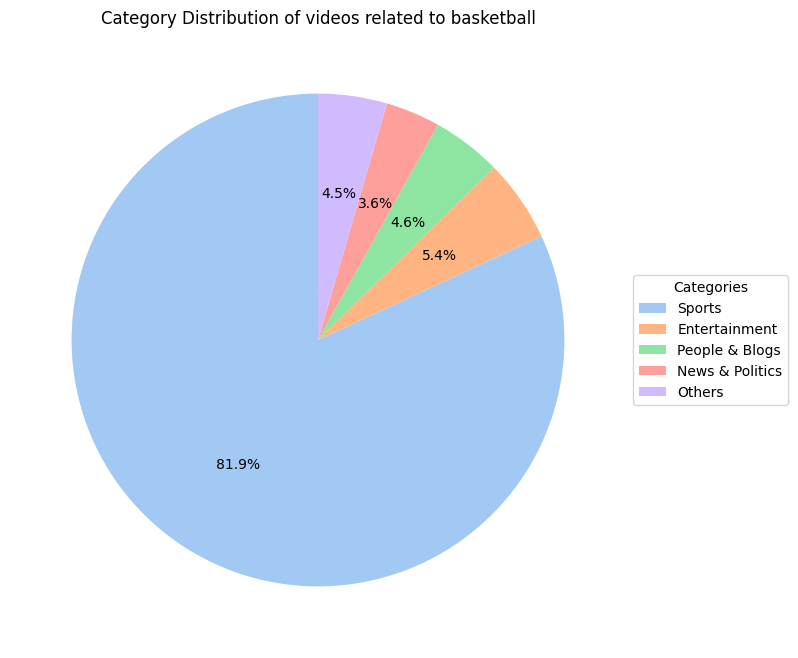

In [237]:
# set small percentage categories as others
category_percentage_wrt_nbs_large=df_category_percentage_wrt_nbs[df_category_percentage_wrt_nbs["percentage"]>=1]
category_percentage_wrt_nbs_others=df_category_percentage_wrt_nbs[df_category_percentage_wrt_nbs["percentage"]<1]

others_sum=category_percentage_wrt_nbs_others["percentage"].sum()
others_row = pd.DataFrame({'categories': ['Others'], 'percentage': [others_sum]})
# others_row=others_row.set_index('categories')
category_percentage_wrt_nbs=pd.concat([category_percentage_wrt_nbs_large,others_row])
category_percentage_wrt_nbs=category_percentage_wrt_nbs.set_index('categories')

# Plot a pie chart
colors = sns.color_palette("pastel", len(category_percentage_wrt_nbs))
plt.figure(figsize=(8, 8))  # Set figure size
plt.pie(category_percentage_wrt_nbs['percentage'], startangle=90,labels=None,colors=colors,autopct='%1.1f%%')
plt.legend(labels=category_percentage_wrt_nbs.index, loc="center left", bbox_to_anchor=(1, 0.5), title="Categories")
# Add a title
plt.title('Category Distribution of videos related to basketball')

# Display the plot
plt.show()


In [261]:
filtered_df_nba["upload_date"]=pd.to_datetime(filtered_df_nba["upload_date"])
filtered_df_nba["year-month"]=filtered_df_nba["upload_date"].dt.year+filtered_df_nba["upload_date"].dt.month
filtered_df_nba["year-month"]

/var/folders/m7/41nytqlj2xz8_vx7g_hdxdfm0000gn/T/ipykernel_82272/2499839732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_nba["upload_date"]=pd.to_datetime(filtered_df_nba["upload_date"])
/var/folders/m7/41nytqlj2xz8_vx7g_hdxdfm0000gn/T/ipykernel_82272/2499839732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_nba["year-month"]=filtered_df_nba["upload_date"].dt.year+filtered_df_nba["upload_date"].dt.month


index
58         2022
95         2018
191        2019
192        2029
193        2029
           ... 
5577977    2026
5577997    2028
5577998    2028
5578218    2021
5579182    2023
Name: year-month, Length: 518795, dtype: int32

## Channels

In [146]:
print(filtered_str_both['channel_id'].value_counts())
print('Channels that have more than 1000 videos: {} channels'.format(sum(filtered_str_both['channel_id'].value_counts()>1000)))



channel_id
UCpGimyrbwRtrcJ-CIiRDXbA    33709
UCWJ2lWNubArHWmf3FIHbfcQ    24728
UCLd4dSmXdrJykO_hgOzbfPw    21523
UCEjOSbbaOfgnfRODEEMYlCw    13918
UCqMtxjKnR7ySbEZSs2N-v0Q     7700
                            ...  
UCHSWAG5og0azWCiZc0QcOMg        1
UCHRPio4-pHW3HtjQYpzS40w        1
UCHQJMK5GqahYRVWzooWvY7g        1
UCUPfRa2JQtzWQZC7mLsr7bQ        1
UCiqEQvhAbWYr_SbouycUJJQ        1
Name: count, Length: 1401, dtype: int64
Channels that have more than 1000 videos: 35 channels


In [139]:
filtered_str_both[filtered_str_both['channel_id']=='UCpGimyrbwRtrcJ-CIiRDXbA'].sort_values("year")

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,year,month
279833,Sports,UCpGimyrbwRtrcJ-CIiRDXbA,2019-11-01 02:14:12.562930,0.0,4QPvW178Rno,84,1.0,"Sioux Falls Skyforce,Dakota Wizards,NBA D-Leag...","Skyforce 88, Wizards 93",2011-12-31 00:00:00,225.0,2011,12
275985,Sports,UCpGimyrbwRtrcJ-CIiRDXbA,2019-11-01 02:14:40.000888,0.0,b4nmCMZCr-k,58,1.0,"NBA D-League,Maine Redclaws,Erie Bayhawks,high...","Redclaws 87, Bayhawks 105",2011-12-01 00:00:00,95.0,2011,12
275988,Sports,UCpGimyrbwRtrcJ-CIiRDXbA,2019-11-01 02:14:38.544599,0.0,Uvy4kj-BLm4,63,1.0,"NBA D-League,Texas Legends,Tulsa 66ers,Basketball","Tulsa 66ers 97, Texas Legends 84",2011-11-30 00:00:00,173.0,2011,11
275989,Sports,UCpGimyrbwRtrcJ-CIiRDXbA,2019-11-01 02:14:41.064015,0.0,apvEd8ebN_c,70,2.0,"NBA D-League,NBADL,NBA,Development League,Nati...","Energy 108, Vipers 134",2011-11-30 00:00:00,343.0,2011,11
275990,Sports,UCpGimyrbwRtrcJ-CIiRDXbA,2019-11-01 02:14:30.714562,0.0,6izkyjJIQys,79,3.0,"NBA D-League,Austin Toros,Texas Legends,Del Ha...",highlights_austex_112611.flv.flv,2011-11-27 00:00:00,362.0,2011,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297123,Sports,UCpGimyrbwRtrcJ-CIiRDXbA,2019-11-01 01:53:31.600946,0.0,DpXsUCj_8xw,94,4.0,"Donte Grantham,Agua Caliente Clippers vs. Okla...",Donte Grantham (24 points) Highlights vs. Agua...,2019-01-04 00:00:00,330.0,2019,1
297122,Sports,UCpGimyrbwRtrcJ-CIiRDXbA,2019-11-01 01:53:33.021024,0.0,eINZZjcxpx4,86,4.0,"Jerome Robinson,Agua Caliente Clippers vs. Okl...",Jerome Robinson (28 points) Highlights vs. Okl...,2019-01-04 00:00:00,163.0,2019,1
297121,Sports,UCpGimyrbwRtrcJ-CIiRDXbA,2019-11-01 01:53:32.489876,0.0,LDpNEqnubnE,86,4.0,"Jerome Robinson,Agua Caliente Clippers vs. Okl...",Jerome Robinson (28 points) Highlights vs. Okl...,2019-01-04 00:00:00,608.0,2019,1
297132,Sports,UCpGimyrbwRtrcJ-CIiRDXbA,2019-11-01 01:53:32.419352,0.0,ARPtA_QIG6s,121,7.0,"Tyler Cavanaugh,Salt Lake City Stars vs. Sioux...",Tyler Cavanaugh (23 points) Highlights vs. Sio...,2019-01-04 00:00:00,1012.0,2019,1
